<AxesSubplot:xlabel='Time'>

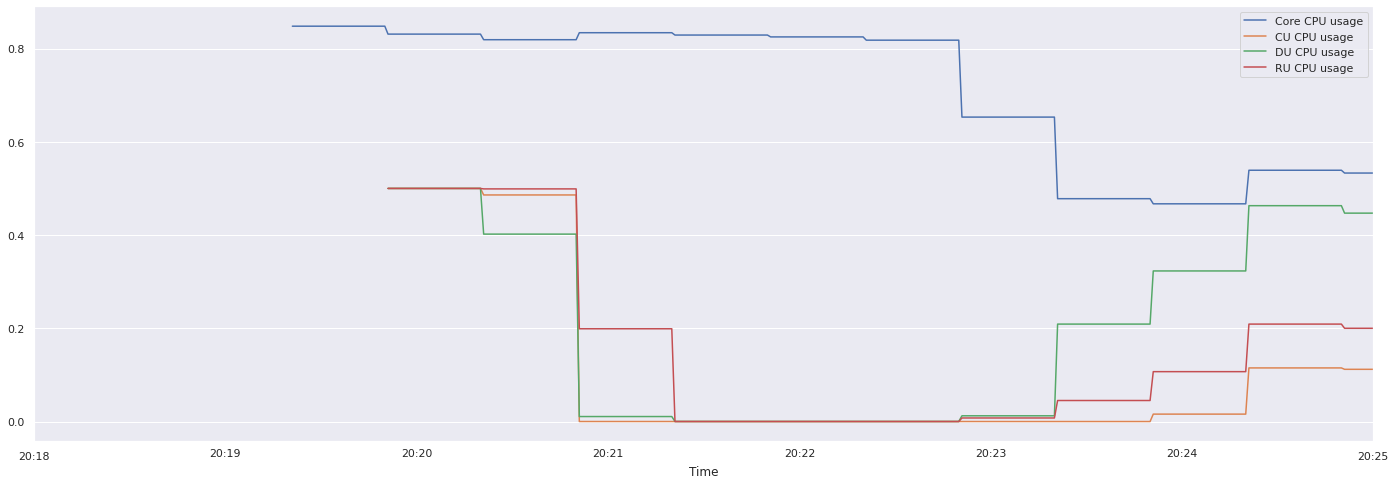

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
df_core_cpu_usage = pd.read_csv('csv/core-cpu-usage.csv',  delimiter=',', header=0)
df_core_cpu_usage['Time'] = pd.to_datetime(df_core_cpu_usage['Time'])
df_core_cpu_usage["free5gc"] = pd.to_numeric(df_core_cpu_usage["free5gc"])

ax = df_core_cpu_usage.plot(kind='line', y='free5gc', x='Time',label='Core CPU usage')

df_cu_cpu_usage = pd.read_csv('csv/cu-cpu-usage.csv',  delimiter=',', header=0)
df_cu_cpu_usage['Time'] = pd.to_datetime(df_cu_cpu_usage['Time'])
df_cu_cpu_usage["cu"] = pd.to_numeric(df_cu_cpu_usage["cu"])

df_cu_cpu_usage.plot(kind='line', y='cu', x='Time',label='CU CPU usage', ax=ax)

df_du_cpu_usage = pd.read_csv('csv/du-cpu-usage.csv',  delimiter=',', header=0)
df_du_cpu_usage['Time'] = pd.to_datetime(df_du_cpu_usage['Time'])
df_du_cpu_usage["du"] = pd.to_numeric(df_du_cpu_usage["du"])

df_du_cpu_usage.plot(kind='line', y='du', x='Time',label='DU CPU usage', ax=ax)

df_ru_cpu_usage = pd.read_csv('csv/ru-cpu-usage.csv',  delimiter=',', header=0)
df_ru_cpu_usage['Time'] = pd.to_datetime(df_ru_cpu_usage['Time'])
df_ru_cpu_usage["ru"] = pd.to_numeric(df_ru_cpu_usage["ru"])

df_ru_cpu_usage.plot(kind='line', y='ru', x='Time',label='RU CPU usage', ax=ax, figsize=(24,8))


In [19]:
df_logs = pd.read_csv('csv/logs.csv',  delimiter='::', header=0)
df_logs['time'] = pd.to_datetime(df_logs['time'])


/home/vmadmin/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [22]:
df_logs_count = df_logs.groupby(['time','kubernetes.container_name']).size().reset_index(name='counts')

plt.xlabel("Time")
plt.ylabel("CPU")
plt.legend()
plt.savefig('out/Scenario-1.pdf', bbox_inches='tight')
plt.savefig('out/Scenario-1.png', dpi=300, bbox_inches='tight')